In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

train_images = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/train_images.npy')
train_binary_masks = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/train_binary_masks.npy')
print("Training data loaded")

Training data loaded


In [ ]:
val_images = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/val_images.npy')
val_binary_masks = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/val_binary_masks.npy')
print("Validation data loaded")

Validation data loaded


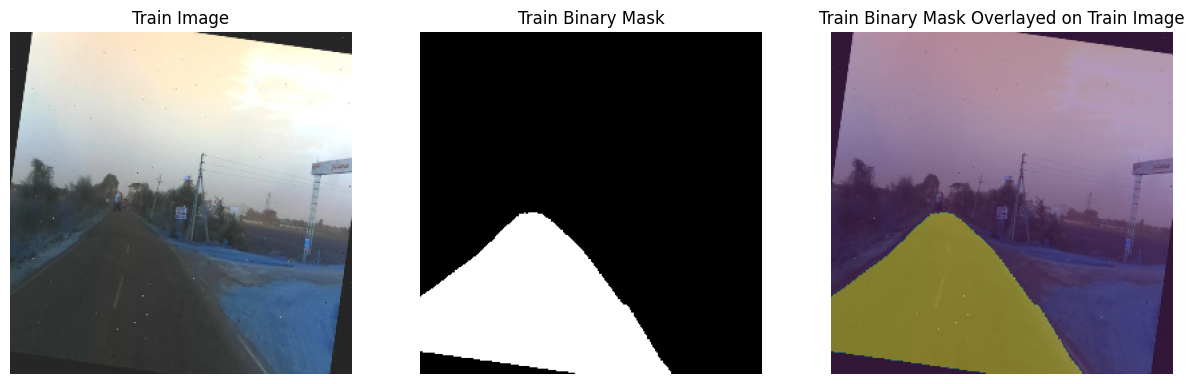

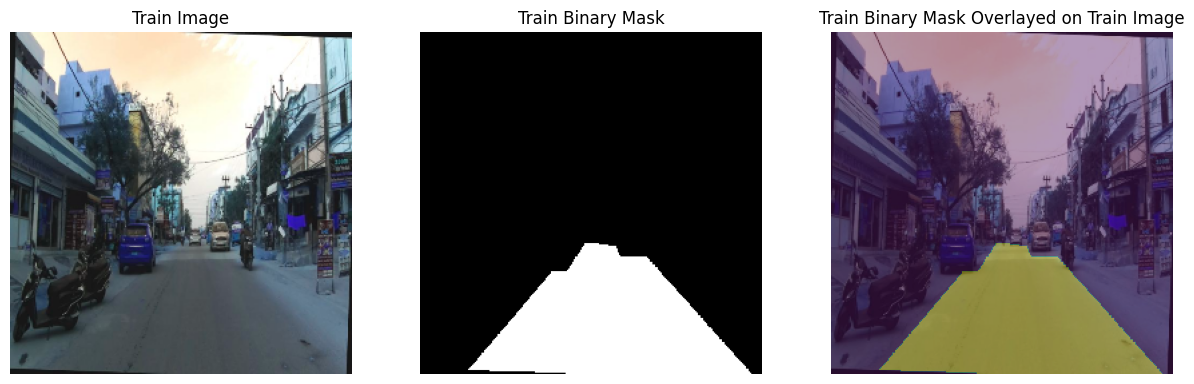

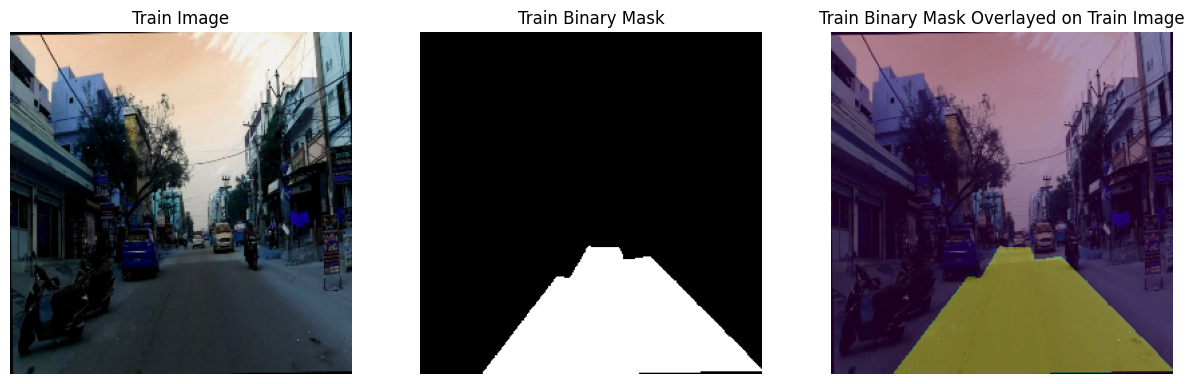

In [ ]:
for index in [0, 2, 3]:
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.imshow(train_images[index])
    plt.title('Train Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(train_binary_masks[index], cmap='gray')
    plt.title('Train Binary Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(train_binary_masks[index])
    plt.imshow(train_images[index], alpha=0.6)
    plt.title('Train Binary Mask Overlayed on Train Image')
    plt.axis('off')

In [ ]:
class CustomDataGenerator(Sequence):
    def __init__(self, images, masks, batch_size):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, idx):
        batch_images = self.images[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_masks = self.masks[idx * self.batch_size : (idx + 1) * self.batch_size]

        return batch_images, batch_masks

train_generator = CustomDataGenerator(train_images, train_binary_masks, batch_size=16)
val_generator = CustomDataGenerator(val_images, val_binary_masks, batch_size=2)


In [ ]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3]) + smooth
    denominator = tf.reduce_sum(y_true + y_pred, axis=[1, 2, 3]) + smooth
    return tf.reduce_mean(numerator / denominator)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_dice_bce_loss(y_true, y_pred, alpha=0.6):
    dice_loss = 1 - dice_coefficient(y_true, y_pred)
    bce_loss = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    return dice_loss + bce_loss


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model=enhanced_simplified_hrnet(input_shape=(256, 256, 3))

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'AUC', 'binary_accuracy', 'Recall']
)
print("Model recompiled")

early_stopping = EarlyStopping(
    monitor='val_recall',
    patience=5,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

checkpoint_filepath = '/content/drive/MyDrive/Robo_final/new_trained_hrnet_second.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

print("Training completed")


Model recompiled
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.9079 - Precision: 0.7127 - Recall: 0.7537 - accuracy: 0.8485 - binary_accuracy: 0.8485 - loss: 0.3398
Epoch 1: val_loss improved from inf to 3.94004, saving model to /content/drive/MyDrive/Robo_final/new_trained_hrnet_50.keras


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,binary_accuracy,loss,val_AUC,val_Precision,val_Recall,val_accuracy,val_binary_accuracy,val_loss
  current = self.get_monitor_value(logs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 50s 169ms/step - AUC: 0.9081 - Precision: 0.7131 - Recall: 0.7539 - accuracy: 0.8488 - binary_accuracy: 0.8488 - loss: 0.3393 - val_AUC: 0.5916 - val_Precision: 0.2729 - val_Recall: 1.0000 - val_accuracy: 0.2740 - val_binary_accuracy: 0.2740 - val_loss: 3.9400
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - AUC: 0.9692 - Precision: 0.8518 - Recall: 0.8408 - accuracy: 0.9203 - binary_accuracy: 0.9203 - loss: 0.1963
Epoch 2: val_loss improved from 3.94004 to 1.26108, saving model to /content/drive/MyDrive/Robo_final/new_trained_hrnet_50.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - AUC: 0.9692 - Precision: 0.8517 - Recall: 0.8408 - accuracy: 0.9203 - binary_accuracy: 0.9203 - loss: 0.1963 - val_AUC: 0.8294 - val_Precision: 0.3207 - val_Recall: 0.9996 - val_accuracy: 0.4230 - val_binary_accuracy: 0.4230 - val_loss: 1.2611
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - AUC: 0.9770 - Precision: 0.8680 - Recall: 0.8770 - accuracy: 0.9326 - 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = load_model('/content/drive/MyDrive/No_Aug/hrnet_model_resnet_first.h5')
print("Trained model loaded")

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'AUC', 'binary_accuracy', 'Recall']
)
print("Model recompiled")

early_stopping = EarlyStopping(
    monitor='val_recall',
    patience=5,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

checkpoint_filepath = '/content/drive/MyDrive/Robo_final/new_hrnet1.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)
model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

print("Training completed")


Trained model loaded
Model recompiled
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - AUC: 0.9727 - Precision: 0.8584 - Recall: 0.8591 - accuracy: 0.9266 - binary_accuracy: 0.9266 - loss: 0.1904
Epoch 1: val_loss improved from inf to 0.24531, saving model to /content/drive/MyDrive/Robo_final/new_hrnet1.keras


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,binary_accuracy,loss,val_AUC,val_Precision,val_Recall,val_accuracy,val_binary_accuracy,val_loss
  current = self.get_monitor_value(logs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 107s 288ms/step - AUC: 0.9728 - Precision: 0.8585 - Recall: 0.8593 - accuracy: 0.9267 - binary_accuracy: 0.9267 - loss: 0.1902 - val_AUC: 0.9593 - val_Precision: 0.8553 - val_Recall: 0.7556 - val_accuracy: 0.8986 - val_binary_accuracy: 0.8986 - val_loss: 0.2453
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - AUC: 0.9873 - Precision: 0.8927 - Recall: 0.9073 - accuracy: 0.9476 - binary_accuracy: 0.9476 - loss: 0.1256
Epoch 2: val_loss improved from 0.24531 to 0.14425, saving model to /content/drive/MyDrive/Robo_final/new_hrnet1.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 262ms/step - AUC: 0.9873 - Precision: 0.8928 - Recall: 0.9074 - accuracy: 0.9476 - binary_accuracy: 0.9476 - loss: 0.1255 - val_AUC: 0.9842 - val_Precision: 0.8963 - val_Recall: 0.8839 - val_accuracy: 0.9405 - val_binary_accuracy: 0.9405 - val_loss: 0.1443
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - AUC: 0.9900 - Precision: 0.9080 - Recall: 0.9200 - accuracy: 0.9543 - binary_ac

In [ ]:
model.save('new_hrnet.h5')
print("Trained model saved in HDF5 format")


Trained model saved in HDF5 format
